In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# EDA

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

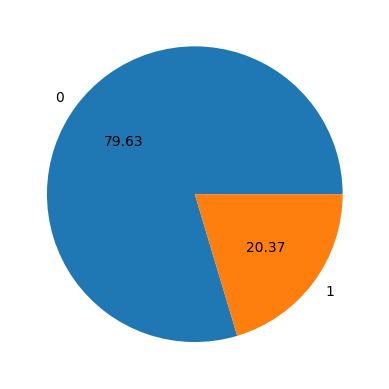

In [ ]:
exit = pd.Series(data['Exited'])

exit_values_count = exit.value_counts()

legends = ['0','1']
plt.pie(exit_values_count, autopct='%.2f',labels=legends)
plt.show()

In [ ]:
data = data.dropna()
x = data.drop('Exited', axis = 1)
y = data.Exited
for col in x.select_dtypes(['object','float']):
  x[col], _ = x[col].factorize()
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   RowNumber        10000 non-null  int64
 1   CustomerId       10000 non-null  int64
 2   Surname          10000 non-null  int64
 3   CreditScore      10000 non-null  int64
 4   Geography        10000 non-null  int64
 5   Gender           10000 non-null  int64
 6   Age              10000 non-null  int64
 7   Tenure           10000 non-null  int64
 8   Balance          10000 non-null  int64
 9   NumOfProducts    10000 non-null  int64
 10  HasCrCard        10000 non-null  int64
 11  IsActiveMember   10000 non-null  int64
 12  EstimatedSalary  10000 non-null  int64
dtypes: int64(13)
memory usage: 1015.8 KB


In [ ]:
from sklearn.feature_selection import mutual_info_classif
miscore = mutual_info_classif(x,y)
miscore = pd.Series(miscore, name = 'MiScore', index = x.columns)
miscore = miscore.sort_values(ascending = False)
miscore

NumOfProducts      0.069535
Age                0.061086
Geography          0.018800
IsActiveMember     0.010823
Balance            0.009072
Gender             0.008776
HasCrCard          0.005516
Surname            0.004923
CreditScore        0.001773
Tenure             0.001505
RowNumber          0.000000
CustomerId         0.000000
EstimatedSalary    0.000000
Name: MiScore, dtype: float64

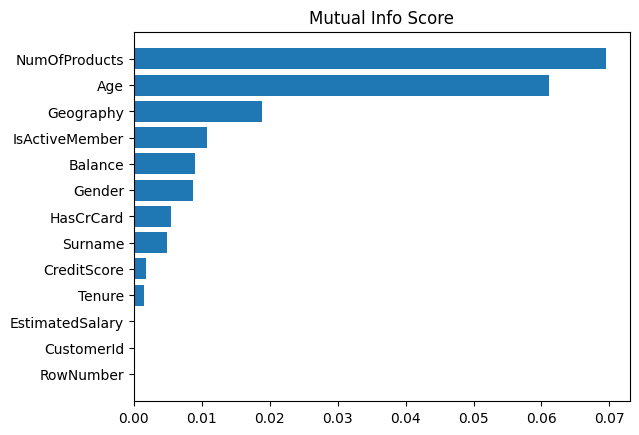

<Figure size 900x600 with 0 Axes>

In [ ]:
def plot_miscore(scores):
  scores = scores.sort_values(ascending = True)
  width = np.arange(len(scores))
  ticks = list(scores.index)
  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title('Mutual Info Score')
  plt.figure(dpi = 100, figsize=(9,6))

plot_miscore(miscore)

In [ ]:
x = x.drop(['EstimatedSalary','CustomerId','RowNumber','Tenure','Surname'],axis=1)

In [ ]:
x
# y

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,619,0,0,42,0,1,1,1
1,608,1,0,41,1,1,0,1
2,502,0,0,42,2,3,1,0
3,699,0,0,39,0,2,0,0
4,850,1,0,43,3,1,1,1
...,...,...,...,...,...,...,...,...
9995,771,0,1,39,0,2,1,0
9996,516,0,1,35,6379,1,1,1
9997,709,0,0,36,0,1,0,1
9998,772,2,1,42,6380,2,1,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100,criterion='gini')
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_model.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.8496666666666667


In [ ]:
inp = np.array(['600','1','1','35','3500','5','1','1'])
inp = np.reshape(inp, (1,-1))
rf_model.predict(inp)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
gb_model = GradientBoostingClassifier()

In [ ]:
gb_model.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_gb_pred = gb_model.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_gb_pred))

0.86


In [ ]:
inp = np.array(['600','1','1','35','3500','5','1','1'])
inp = np.reshape(inp, (1,-1))
gb_model.predict(inp)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
gb_r_model = GradientBoostingRegressor()

In [ ]:
gb_r_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
y_gb_r_pred = gb_r_model.predict(x_test)

In [ ]:
print(gb_r_model.score(x_train,y_train))
print(gb_r_model.score(x_test,y_test))

0.4024131026246205
0.3422455347387504


In [ ]:
inp = np.array(['600','1','1','35','3500','5','1','1'])
inp = np.reshape(inp, (1,-1))
gb_r_model.predict(inp)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([0.86323842])